----

### Project Title
# Everything Plus - Household Utensils

### Project Description

Segment users based on their consumer profiles

# Task

- Conduct exploratory data analysis.
- Segment users based on purchase history. Feel free to implement your own ideas for segmenting users. Think about how segmentation can help you develop more personalized offers for different - users. Try to form segments based on what users buy. You can analyze their purchases and segment the goods according to the product category they belong to.
- Formulate and test statistical hypotheses.


# Data Description

The dataset contains the transaction history of Everything Plus, an online store selling household goods.

### The file ecommerce_dataset_us.csv contains the following columns:

invoice_no — order identifier

stock_code — item identifier

Description — item name

Quantity — quantity of items

invoice_date — order date

unit_price — price per item

customer_id — customer ID

### Importing Libraries

In [202]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [203]:
df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

### Data understanding

In [204]:
# Viewing Data, Types, and Checking for Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [205]:
# Getting a Better View of the Data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,11/29/2018 08:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,11/29/2018 08:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,11/29/2018 08:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,11/29/2018 08:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,11/29/2018 08:34,1.69,13047.0


In [206]:
# Getting a Description of the Data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Note:

- After using info(), I identified missing values in ['description'] and ['customer_id'], as well as incorrect data types in ['invoice_date'] and ['customer_id'].

- After analyzing the data, I’ll assume that duplicate entries should not be kept in the dataframe, considering them as possible system errors or user registration issues, or other potential human errors that may have occurred.

### Data Preprocessing

In [207]:
# Changing columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid'],
      dtype='object')

In [208]:
# Renaming columns for better identification
df.rename(columns={"invoiceno": "invoice_no", "stockcode": "stock_code",
                   "invoicedate": "invoice_date", "unitprice": "unit_price",
                   "customerid": "customer_id"}, inplace=True)

In [209]:
# Changing data types
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [210]:
# Getting missing values
df.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
dtype: int64

In [211]:
# Getting duplicate values
df.duplicated().value_counts()

False    536641
True       5268
Name: count, dtype: int64

In [212]:
# Deleting duplicate values
df = df.drop_duplicates()

In [213]:
# Observing the results
df.duplicated().value_counts()

False    536641
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [214]:
# Modifying the dataframe to have only quantities greater than 0 and resolving the negative value issue.
df = df[df['quantity'] > 0]

Note:

- Negative values were hindering the analysis since it’s not possible for a customer to purchase an item that is out of stock or unavailable. The negative values might be due to human errors during inventory checks and quantity updates. Correcting these errors is essential to performing accurate analysis and understanding our customers' behavior.

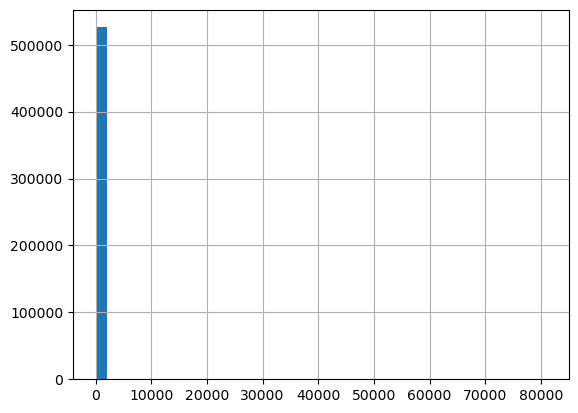

In [215]:
# Getting the distribution of purchase quantities
df['quantity'].hist(bins=40);

In [216]:
# Getting the quartiles and performing a better analysis of df['quantity']
print(df['quantity'].describe())

count    526054.000000
mean         10.730874
std         157.591838
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: quantity, dtype: float64


In [217]:
# Modifying the dataframe to have only values greater than 0 and resolving the negative value issues.
df = df[df['unit_price'] > 0]

Note: 

- Resolving the negative value issues is essential for performing the analysis, as customers cannot purchase products with values below 0. The negative values may be a result of human error when entering and defining the product prices, and this problem needs to be addressed.

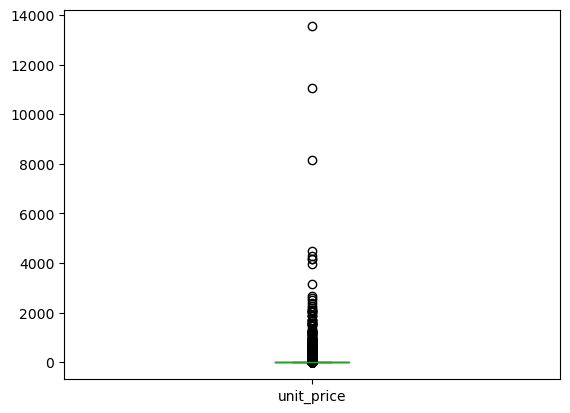

In [218]:
# Getting the price distribution by product
df['unit_price'].plot(kind='box');

In [219]:
print(df['unit_price'].describe())

count    524878.000000
mean          3.922573
std          36.093028
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: unit_price, dtype: float64


Note: 

- In the chart above, there are very high values that we can consider as a bias.

In [220]:
# Looking for any connection in the missing customer_id data
df[df['customer_id'].isna()].tail(30)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
541511,581498,71053,WHITE MOROCCAN METAL LANTERN,1,2019-12-07 10:26:00,8.29,NaN
541512,581498,72349b,SET/6 PURPLE BUTTERFLY T-LIGHTS,2,2019-12-07 10:26:00,4.13,NaN
541513,581498,79321,CHILLI LIGHTS,10,2019-12-07 10:26:00,12.46,NaN
541514,581498,82001s,SILVER RECORD COVER FRAME,2,2019-12-07 10:26:00,7.46,NaN
541515,581498,82482,WOODEN PICTURE FRAME WHITE FINISH,4,2019-12-07 10:26:00,4.96,NaN
541516,581498,82552,WASHROOM METAL SIGN,1,2019-12-07 10:26:00,2.46,NaN
541517,581498,82580,BATHROOM METAL SIGN,1,2019-12-07 10:26:00,1.25,NaN
541518,581498,82581,TOILET METAL SIGN,1,2019-12-07 10:26:00,1.25,NaN
541519,581498,82600,N0 SINGING METAL SIGN,4,2019-12-07 10:26:00,4.13,NaN
541520,581498,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2019-12-07 10:26:00,8.29,NaN


Note:

- No connection could be found with the missing data in 'customer_id'.

In [221]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    524878 non-null  object        
 1   stock_code    524878 non-null  object        
 2   description   524878 non-null  object        
 3   quantity      524878 non-null  int64         
 4   invoice_date  524878 non-null  datetime64[ns]
 5   unit_price    524878 non-null  float64       
 6   customer_id   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.0+ MB


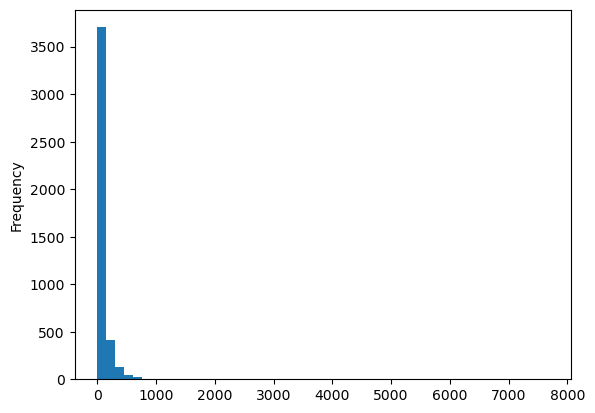

In [223]:
# Getting the number of transactions per customer
df['customer_id'].value_counts().plot(kind='hist', bins=50);

In [224]:
# Identifying the top 10 best-selling items
df['description'].value_counts().head(10)

description
WHITE HANGING HEART T-LIGHT HOLDER    2311
JUMBO BAG RED RETROSPOT               2109
REGENCY CAKESTAND 3 TIER              2007
PARTY BUNTING                         1699
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: count, dtype: int64

In [225]:
# Getting the most sold products in each transaction
df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
JUMBO BAG RED RETROSPOT               48371
WHITE HANGING HEART T-LIGHT HOLDER    37872
POPCORN HOLDER                        36749
PACK OF 72 RETROSPOT CAKE CASES       36396
ASSORTED COLOUR BIRD ORNAMENT         36362
RABBIT NIGHT LIGHT                    30739
MINI PAINT SET VINTAGE                26633
Name: quantity, dtype: int64

Note: 

- Among the best-selling items and the items most common in each transaction, we can observe that we have: 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT', 'PACK OF 72 RETROSPOT CAKE CASES', 'ASSORTED COLOUR BIRD ORNAMENT'. In other words, these items are not only among the best-selling but are also the most common items in customer purchases.

In [226]:
# Creating the month and weekday columns
df['month'] = df['invoice_date'].dt.month
df['day_of_week'] = df['invoice_date'].dt.day_name()

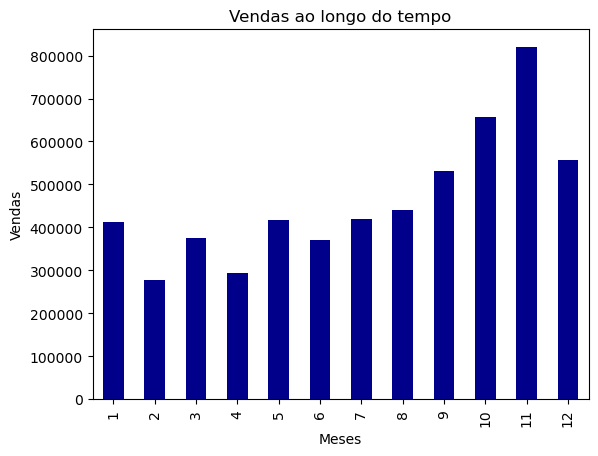

In [227]:
# Plotting the graph to observe sales throughout the months
df.groupby('month')['quantity'].sum().plot(kind='bar', color='darkblue')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Meses')
plt.ylabel('Vendas')
plt.show()

Notes:

- In the charts above, we can observe sales over the months, helping us understand seasonality and identifying when we have the highest sales peaks.

- At the end of the year, we can identify a higher volume of sales, which shows a seasonal behavior associated with end-of-year purchases due to the holidays.

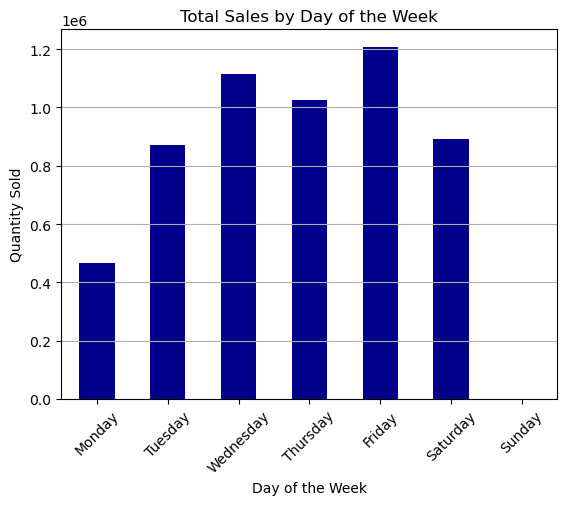

In [228]:
# Grouping and summing the quantity sold by day of the week
vendas_por_dia = df.groupby('day_of_week')['quantity'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the bar chart
vendas_por_dia.plot(kind='bar', color='darkblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Note:

- In the chart above, we can observe that Monday is the day with the lowest sales compared to the other days, and on Sundays, there are no sales, which indicates that it is the day the establishment is closed (rest day).
- In the chart below, we find two biases that need to be corrected to improve our analysis: the quantity and the price per item, as there are extreme points that need to be addressed.

In [229]:
# Removing the identified biases
df.drop(df[df['unit_price'] > 100].index, inplace=True)
df.drop(df[df['quantity'] > 3500].index, inplace=True)

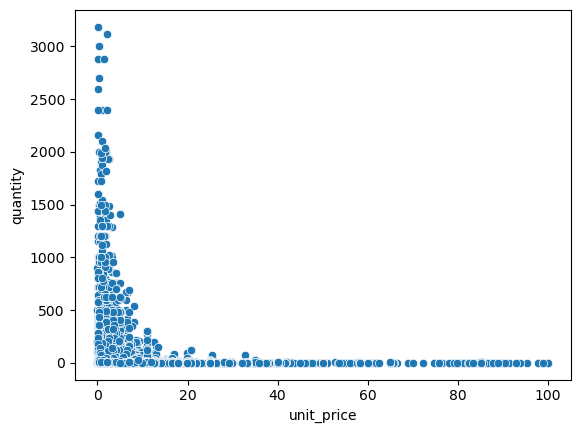

In [230]:
sns.scatterplot(data=df, x='unit_price', y='quantity');

Note:

- In the chart above, we can identify higher sales for cheaper products, while more expensive products have a lower sales rate. This suggests that lower-priced products tend to sell more, while more expensive products have fewer sales.

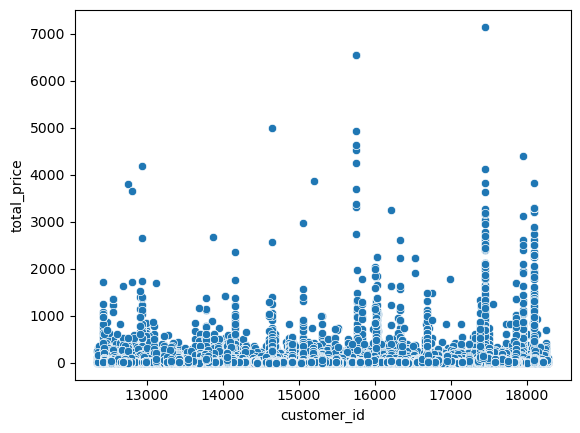

In [231]:
# Getting the total purchase value
df['total_price'] = df['quantity'] * df['unit_price']
sns.scatterplot(data=df, x='customer_id', y='total_price');

Note: 

- The scatter plot shows variation in the total purchase values made by customers. The majority of customers have a total purchase value below Rs 2000, but there is another group of customers with higher purchasing power, reaching up to Rs 7000 in spending.

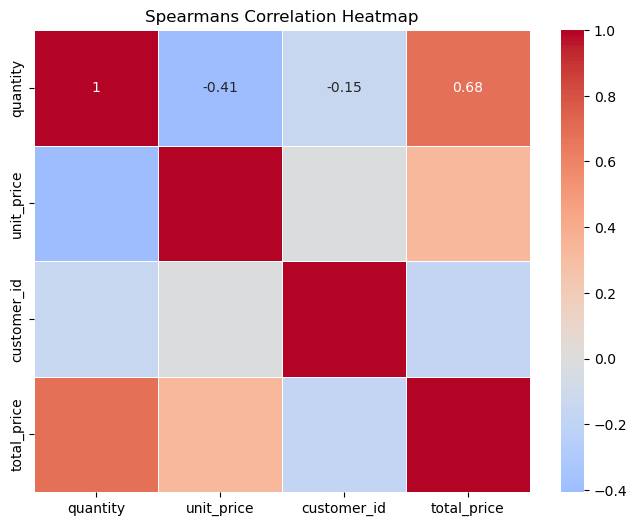

In [232]:
# Creating a heatmap of the correlation matrix

# Selecting the columns
cols = df[['quantity', 'unit_price', 'customer_id', 'total_price']]

# Calculating the correlation matrix
correlation_matrix = cols.corr(method='spearman')

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Spearmans Correlation Heatmap')
plt.show()

In [233]:
# Transforming df['customer_id'] data into int.
df['customer_id'] = df['customer_id'].astype('Int64')

Note:

- The heatmap makes it easier to visualize the data, showing the correlation of the data after cleaning.

In [234]:
# Grouping total sales by month
df['month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['total_price'].sum().reset_index()

# Converting the 'month' column to string for easier visualization on the x-axis
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

# Creating the line plot
fig = px.line(
    monthly_revenue,
    x='month',
    y='total_price',
    title='Revenue over the months',
    markers=True,
    labels={'month': 'Mês', 'total_price': 'Receita Total'}
)

# Displaying the plot
fig.show()

Note:

- The chart shows that sales grow at the beginning of the year and remain relatively flat until September, when sales surge dramatically due to the end-of-year festive period.

In [235]:
monthly_revenue

,month,total_price
0,2018-11,104768.950
1,2018-12,672379.830
2,2019-01,644873.150
3,2019-02,499939.350
4,2019-03,674131.510
5,2019-04,498929.201
6,2019-05,785855.440
7,2019-06,665094.220
8,2019-07,728854.701
9,2019-08,759659.140


In [236]:
# Grouping and calculating the average revenue per order by month
df['month'] = df['invoice_date'].dt.to_period('M')
monthly_avg_ticket = df.groupby('month')['total_price'].mean().reset_index()
# Converting the 'month' column to string to ease visualization on the x-axis
monthly_avg_ticket['month'] = monthly_avg_ticket['month'].astype(str)
# Creating the bar chart
fig = px.bar(
    monthly_avg_ticket,
    x='month',
    y='total_price',
    title='Average ticket by month',
    labels={'month': 'Mês', 'total_price': 'Ticket Médio'},
    color_discrete_sequence=['darkblue']  # Setting the color of the bars
)
# Adjusting the rotation of the x-axis
fig.update_layout(xaxis_tickangle=-45)
# Displaying the chart
fig.show()

Note:

- The average ticket shows some fluctuations throughout the months, ranging from approximately 14 to 22. The lowest average ticket is in January 2019, and the highest is in August 2019.

- A slight decline can be observed in the last months of 2019 (October, November, and December), which could indicate a change in customer behavior or possibly due to a promotion that might have been held during these months.

In [237]:
monthly_avg_ticket

,month,total_price
0,2018-11,20.762772
1,2018-12,18.742295
2,2019-01,17.485714
3,2019-02,19.120333
4,2019-03,19.608246
5,2019-04,17.780798
6,2019-05,20.497547
7,2019-06,19.760948
8,2019-07,18.277113
9,2019-08,21.453843


In [238]:
# Identifying the Top 10 Best-Selling Products by Total Revenue
top_sales_products = df.groupby('description')['total_price'].sum().sort_values(ascending=False).head(10).reset_index()

# Create the bar chart
fig = px.bar(
    top_sales_products,
    x='description',
    y='total_price',
    title='Top 10 Products by Revenue',
    labels={'description': 'Produto', 'total_price': 'Receita Total'},
    color_discrete_sequence=['darkblue']  # Defining the bar color
)

# Adjust the x-axis label rotation
fig.update_layout(xaxis_tickangle=-45)

# Display the chart
fig.show()

Notes:

- Among the products that generated the most revenue, 'Regency Cakestand 3 Tier' was by far the top-selling product.

- 'WHITE HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING', and 'JUMBO BAG RED RETROSPOT' also generated a significantly high revenue compared to the other products.

- For the remaining products, the revenue generated is fairly similar across them.

In [239]:
top_sales_products

,description,total_price
0,REGENCY CAKESTAND 3 TIER,174156.54
1,WHITE HANGING HEART T-LIGHT HOLDER,106236.72
2,PARTY BUNTING,99445.23
3,JUMBO BAG RED RETROSPOT,94159.81
4,RABBIT NIGHT LIGHT,66870.03
5,POSTAGE,65886.19
6,PAPER CHAIN KIT 50'S CHRISTMAS,64875.59
7,ASSORTED COLOUR BIRD ORNAMENT,58927.62
8,CHILLI LIGHTS,54096.36
9,SPOTTY BUNTING,42513.48


In [240]:
# Grouping customer_id by total sales
customer_revenue = df.groupby('customer_id')['total_price'].sum().reset_index()

# Plotting the histogram
fig = px.histogram(customer_revenue, 
                   x='total_price', 
                   nbins=20, 
                   title='Distribution of Revenue by Customer',
                   labels={'total_price': 'Receita Total por Cliente'},
                   color_discrete_sequence=['darkblue'])

# Adding labels to the axes
fig.update_layout(xaxis_title='Total Revenue per Customer', 
                  yaxis_title='Frequência', 
                  bargap=0.2)

# Displaying the graph
fig.show()

Note:

- Most of the customers have generated a low total revenue, however, there are some customers who generated very high revenue, surpassing 50,000 (outliers).

In [241]:
print(customer_revenue.describe())

        customer_id    total_price
count        4328.0    4328.000000
mean   15299.559381    1963.479500
std     1720.972081    8474.746497
min         12347.0       2.900000
25%        13813.75     304.240000
50%         15297.5     665.160000
75%        16778.25    1644.095000
max         18287.0  279986.020000


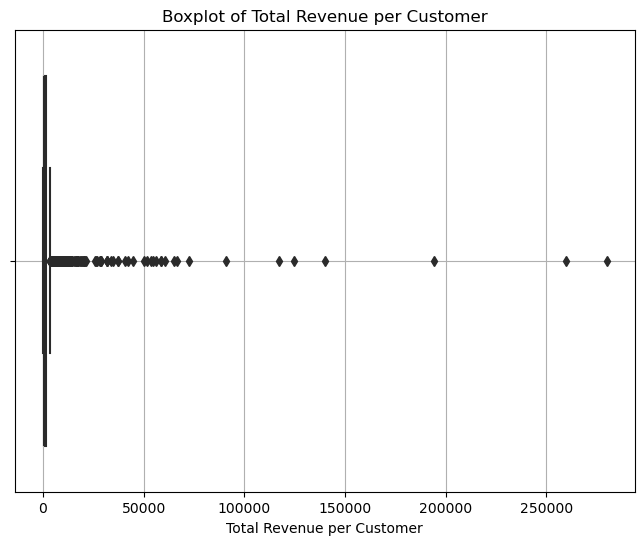

In [242]:
# Grouping customer_id by total sales
customer_revenue = df.groupby('customer_id')['total_price'].sum().reset_index()

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=customer_revenue['total_price'], color='darkblue')
plt.title('Boxplot of Total Revenue per Customer')
plt.xlabel('Total Revenue per Customer')
plt.grid(True)
plt.show()


Note:

- In the above chart, I generated a boxplot to closely observe the outliers.

In [243]:
# Defining threshold for outliers
outliers_lim = customer_revenue['total_price'].quantile(0.95)
# Outlier customers
clientes_outlier = customer_revenue[customer_revenue['total_price'] > outliers_lim]
# Total revenue generated by normal customers and outliers
outliers_revenue = clientes_outlier['total_price'].sum() 
revenue_total = customer_revenue['total_price'].sum()
comum_revenue = revenue_total - outliers_revenue
# Displaying the proportion of revenue generated by outliers
print(f'Revenue generated by outliers: {outliers_revenue / revenue_total:.2%}')
print(f'Revenue generated by normal customers: {comum_revenue / revenue_total:.2%}')


Revenue generated by outliers: 48.93%
Revenue generated by normal customers: 51.07%


Note:

- The outliers, although a minority, generated a revenue similar to that of regular customers, who do not have the significant purchasing power of our outlier customers.

### RFM Analysis
The RFM segmentation groups customers based on their purchasing behavior, considering the recency of the last transaction, the frequency of purchases, and the amount spent. Unlike other methods, it focuses exclusively on historical transaction data, without taking demographic aspects like age or location into account. It uses a scoring system that ranks customers based on the Recency, Frequency, and Monetary Value metrics.

In [244]:
# Defining the last date of the df as a reference
last_date = df['invoice_date'].max()

In [245]:
# Calculating recency (days since the last purchase)
rfm_recency = (last_date - df.groupby('customer_id')['invoice_date'].max()).dt.days
rfm_recency = rfm_recency.reset_index()
rfm_recency.columns = ['customer_id', 'recency']

In [246]:
# Calculating frequency (number of purchases)
rfm_frequency = df.groupby('customer_id')['invoice_date'].nunique().reset_index()
rfm_frequency.columns = ['customer_id', 'frequency']

In [247]:
# Calculating monetary value (total spent)
df['total_price'] = df['quantity'] * df['unit_price']
rfm_monetary = df.groupby('customer_id')['total_price'].sum().reset_index()
rfm_monetary.columns = ['customer_id', 'monetary']

In [248]:
# Displaying the results
rfm = rfm_recency.merge(rfm_frequency, on='customer_id')
rfm = rfm.merge(rfm_monetary, on='customer_id')
print(rfm.head())

   customer_id  recency  frequency  monetary
0        12347        1          7   4310.00
1        12348       74          4   1797.24
2        12349       18          1   1457.55
3        12350      309          1    334.40
4        12352       35          7   1665.74


Note:

- After calculating the RFM metrics, I will proceed with classifying the customers, where I will use a ranking system for each metric (recency, frequency, and monetary), assigning scores from 1 to 5 for each customer, where 5 is the maximum score and indicates the best performance.

In [249]:
# Function to assign RFM scores (from 1 to 5)
def rfm_classification(x, quintiles):
    if x <= quintiles[0.2]:
        return 1
    elif x <= quintiles[0.4]:
        return 2
    elif x <= quintiles[0.6]:
        return 3
    elif x <= quintiles [0.8]:
        return 4
    else:
        return 5

In [250]:
# Calculating the quintiles for each RFM metric
quintiles_recency = rfm['recency'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles_frequency = rfm['frequency'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles_monetary = rfm['monetary'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

In [251]:
# Assigning rankings for recency (the lower, the better)
rfm['R'] = rfm['recency'].apply(rfm_classification, args=(quintiles_recency,))

# Assigning rankings for frequency and monetary (the higher, the better)
rfm['F'] = rfm['frequency'].apply(rfm_classification, args=(quintiles_frequency,))
rfm['M'] = rfm['monetary'].apply(rfm_classification, args=(quintiles_monetary,))

In [252]:
# Creating the RFM score
rfm['RFM_score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# # Displaying the rankings
print(rfm[['customer_id', 'recency', 'frequency', 'monetary', 'R', 'F', 'M', 'RFM_score']].head())

   customer_id  recency  frequency  monetary  R  F  M RFM_score
0        12347        1          7   4310.00  1  5  5       155
1        12348       74          4   1797.24  4  4  4       444
2        12349       18          1   1457.55  2  1  4       214
3        12350      309          1    334.40  5  1  2       512
4        12352       35          7   1665.74  3  5  4       354


Note:

- After calculating the RFM metrics, I will segment the customers based on the RFM scores.

# Explaining the segments:

- Best customers — Customers with the highest score (555). These customers have purchased recently, with high frequency and high monetary value.
- Loyal Customers — Customers with good recency and frequency scores.
- Promising — Customers who have purchased recently (high recency).
- New customers — Customers who have made many purchases.
- At Risk — Customers with low recency, low frequency, and low monetary value.
- Others — A segment that groups customers who do not fit into the other specific categories.

In [253]:
# Creating the function to segment customers based on their RFM scores
def segment_customer(df):
    if df['RFM_score'] == '555':
        return 'Best customers'
    elif df['R'] >= 4 and df['F'] >= 4:
        return 'Loyal Customers'
    elif df['R'] == 5:
        return 'New Customers'
    elif df['F'] >= 4:
        return 'Promissing'
    elif df['R'] <= 2 and df['F'] <= 2 and df['M'] <= 2:
        return 'At Risk'
    else:
        return 'Others'
    
# Applying the segmentation
rfm['segment'] = rfm.apply(segment_customer, axis=1)
# Displaying the count of customers per segment
print(rfm['segment'].value_counts())

segment
Others             1663
Promissing         1288
New Customers       825
At Risk             340
Loyal Customers     207
Best customers        5
Name: count, dtype: int64


In [254]:
counts = rfm['segment'].value_counts().reset_index()
print(counts.columns)


Index(['segment', 'count'], dtype='object')


In [255]:
# Calculating the counts
counts = rfm['segment'].value_counts().reset_index()
counts.columns = ['Segmento', 'Número de Clientes']  # Renaming for clarity

# Creating the bar chart
fig = px.bar(
    counts,
    x='Segmento',
    y='Número de Clientes',
    color='Segmento',
    labels={'Segmento': 'Segmento', 'Número de Clientes': 'Número de Clientes'},
    title='Distribuição de Clientes por Segmento',
    text='Número de Clientes'
)

# Displaying the chart
fig.show()



Notes:

- The chart shows that most of our customers are in the "Others" and "Promising" segments, followed by "New Customers."
- The "Promising" segment contains a large number of customers (1288 customers), indicating that they have the potential to become more valuable and promising as they make more purchases.
- The number of "Best customers" is low (5 customers), suggesting that few customers have high recency, frequency, and monetary value.
- The "At Risk" group is small, with only 340 customers, but it is still important, and we can implement targeted strategies to engage and retain them.

# Revenue by segment

In [256]:
# Calculating total revenue by segment
revenue_per_segment = rfm.groupby('segment')['monetary'].sum().reset_index()
# Renaming the columns for better visualization and understanding
revenue_per_segment.columns = ['segment', 'total_revenue']
# Sorting in descending order
revenue_per_segment = revenue_per_segment.sort_values(by='total_revenue', ascending=False)
# Displaying the results
print(revenue_per_segment)

           segment  total_revenue
5       Promissing    6423975.521
4           Others    1218607.192
3    New Customers     377343.031
2  Loyal Customers     368458.060
0          At Risk      87448.840
1   Best customers      22106.630


In [257]:
fig = px.bar(
    revenue_per_segment,
    x='segment',
    y='total_revenue',
    color='segment',
    labels={'segment': 'Segmento de Cliente', 'total_revenue': 'Receita total'},
    title='Total revenue by segment',
    text='total_revenue'
)

# Exibindo o gráfico
fig.show()

Notes:

- The majority of the revenue generated comes from the "Promising" segment, meaning that although they are not the most frequent, they contribute a significant amount to Everything Plus' revenue.

- The revenue generated by "Others" is also considerable, showing that customers who do not belong to a specific segment are still relevant to Everything Plus' revenue.

- "New Customers" generate a considerable amount of revenue, highlighting the importance of new customers.

- The "Loyal Customers," "At Risk," and "Best Customers" segments contribute less to the revenue, representing the smallest share of the current turnover.

In [258]:
# Count of customers by RFM score
rfm_count = rfm['RFM_score'].value_counts().reset_index()
rfm_count.columns = ['RFM_score', 'customer_count']

# Calculating total revenue for each RFM score
rfm_revenue = rfm.groupby('RFM_score')['monetary'].sum().reset_index()

# Merging the two analyses
rfm_analysis = pd.merge(rfm_count, rfm_revenue, on='RFM_score')

# Displaying the results
print(rfm_analysis)

# Displaying the chart
fig = px.bar(rfm_analysis, x='RFM_score', y='customer_count', title='Count of Customers by RFM Score', labels={'RFM_score': 'Pontuação RFM', 'customer_count': 'Contagem de Clientes'})
fig.show()

    RFM_score  customer_count    monetary
0         155             349  3877795.29
1         511             333    47694.71
2         512             204    70158.70
3         255             180  1092479.26
4         411             147    20675.86
..        ...             ...         ...
111       115               1     3861.00
112       252               1      306.72
113       114               1     1162.65
114       151               1      201.12
115       451               1       70.02

[116 rows x 3 columns]


Notes:

- The RFM score shows a higher concentration of customers with low scores, such as 111, 211, and 311, which indicates that many customers are new or have made few purchases with low value.
- As the scores increase, the number of customers decreases.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



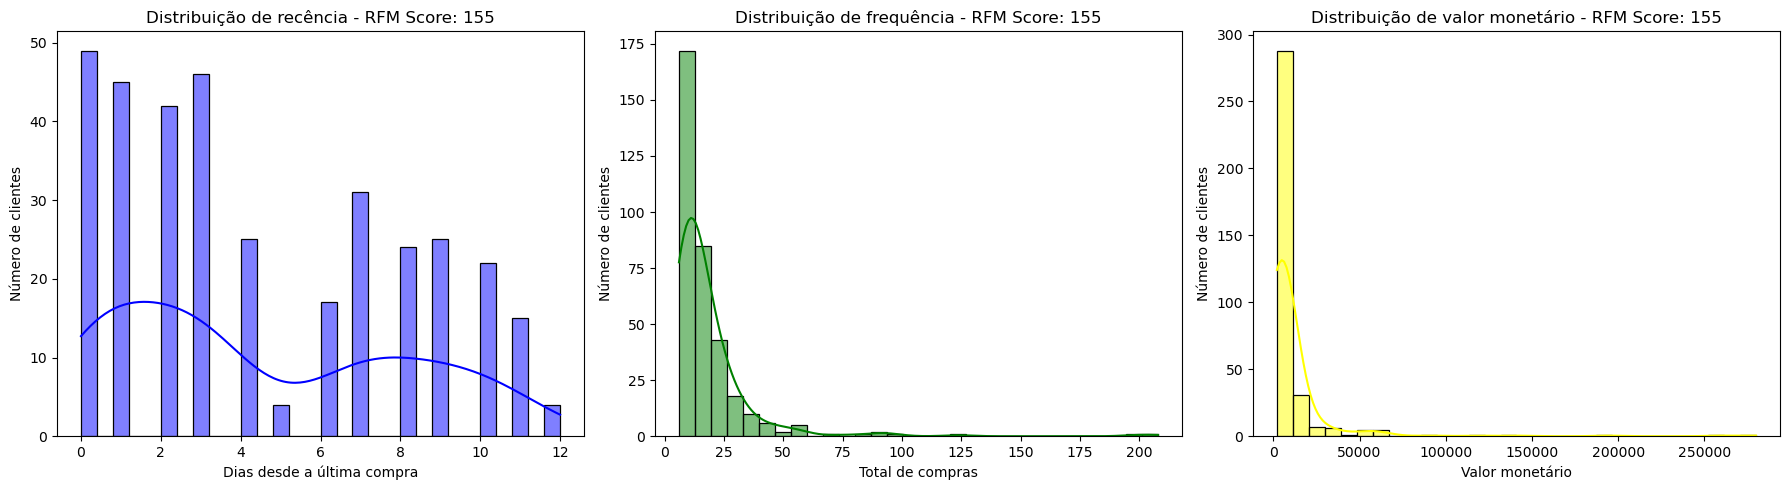

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



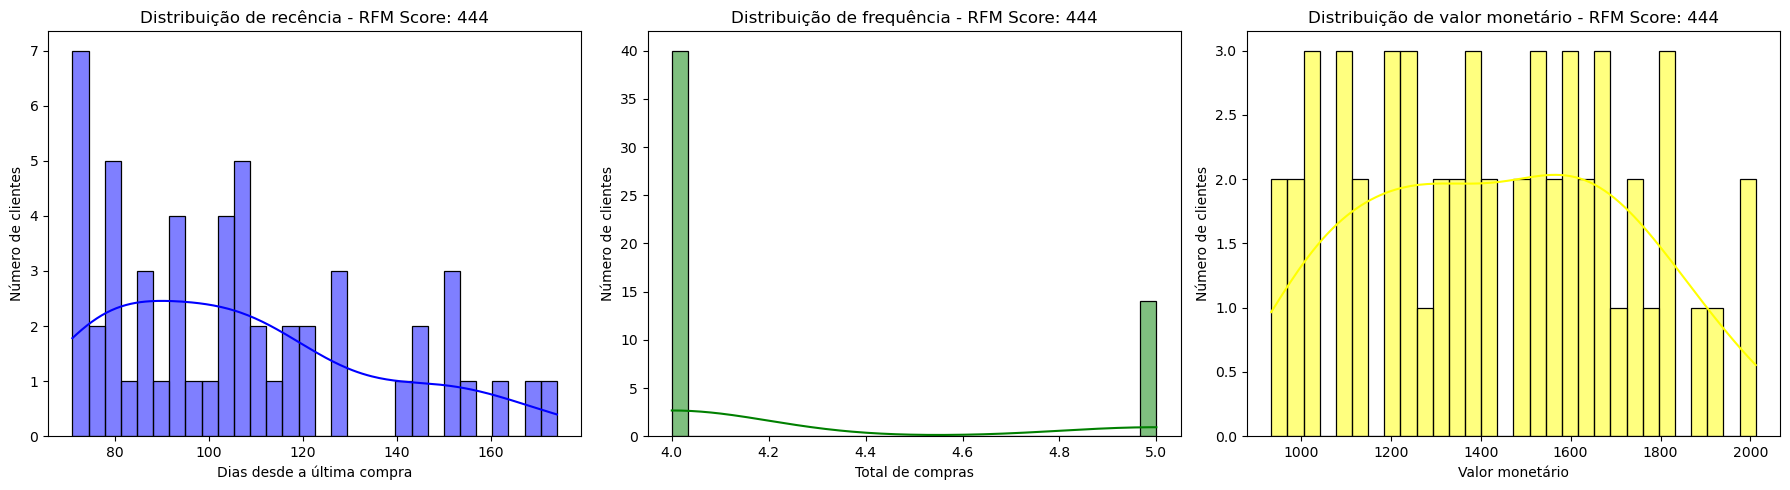

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



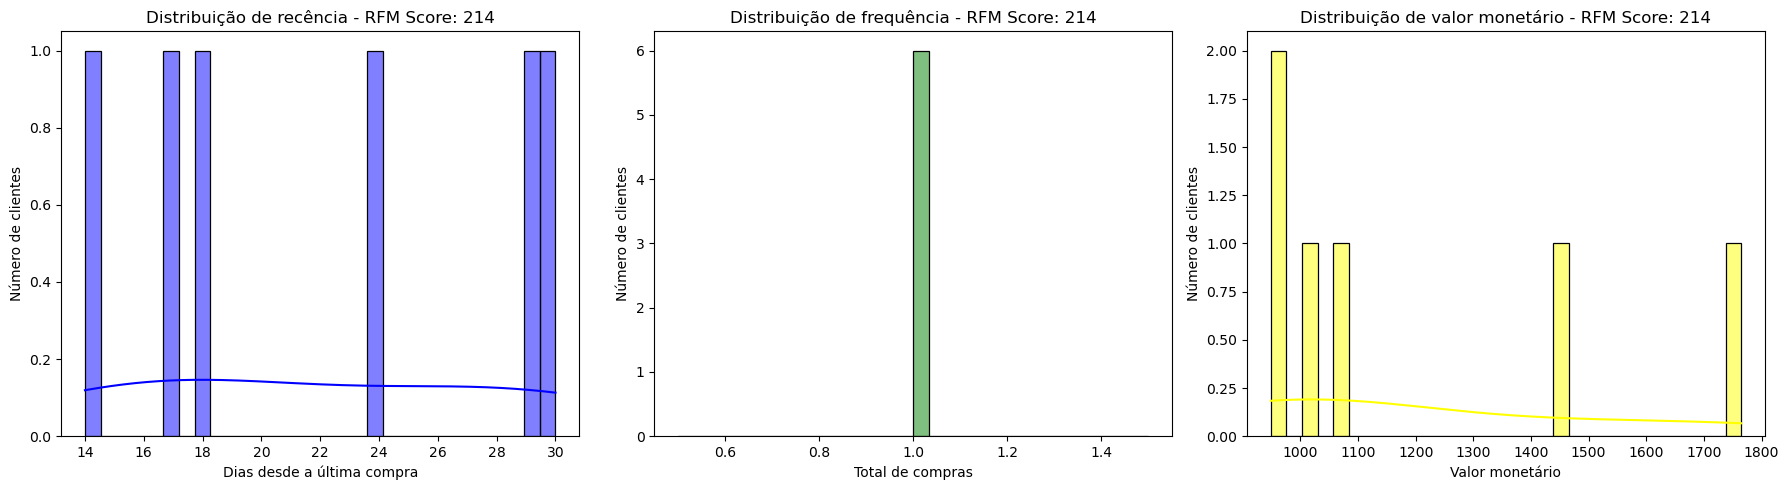

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



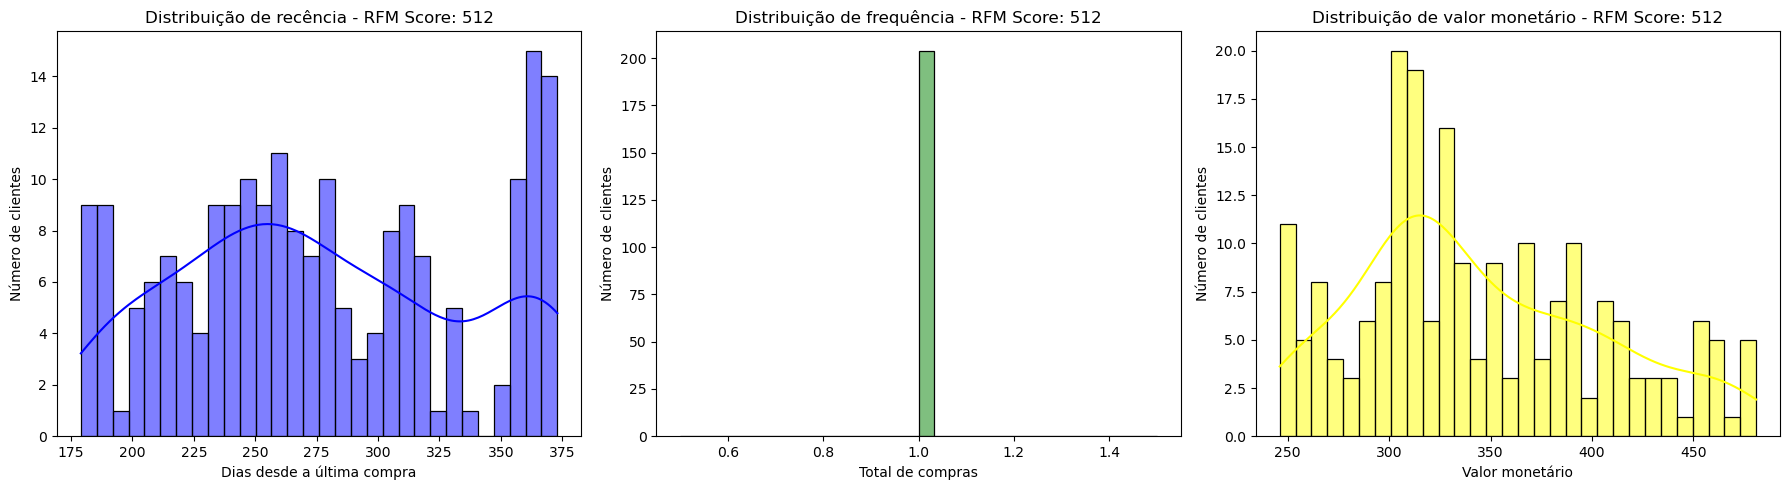

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



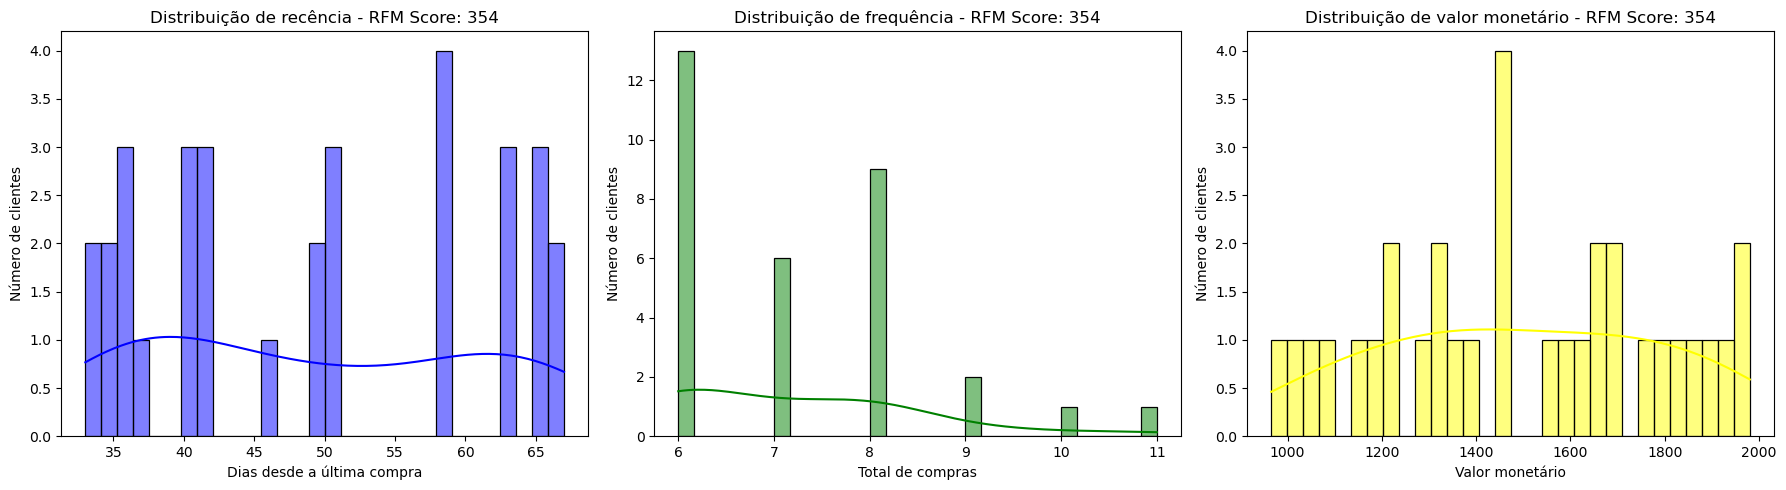

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



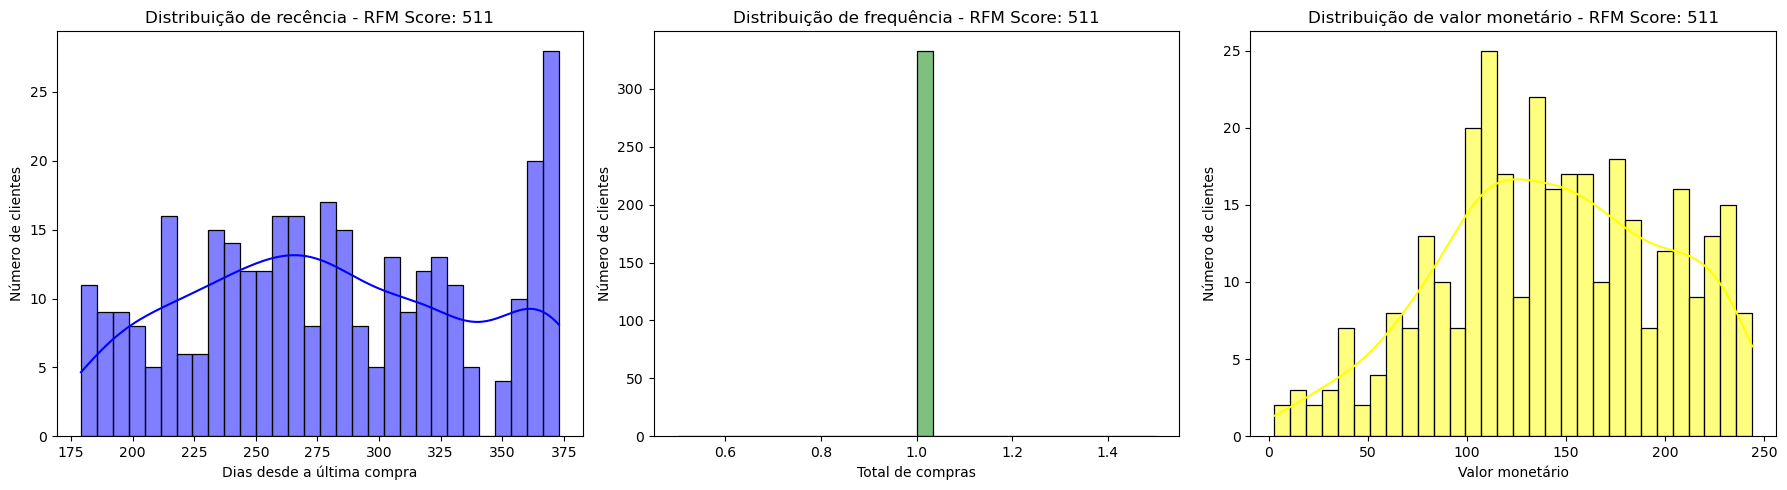

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



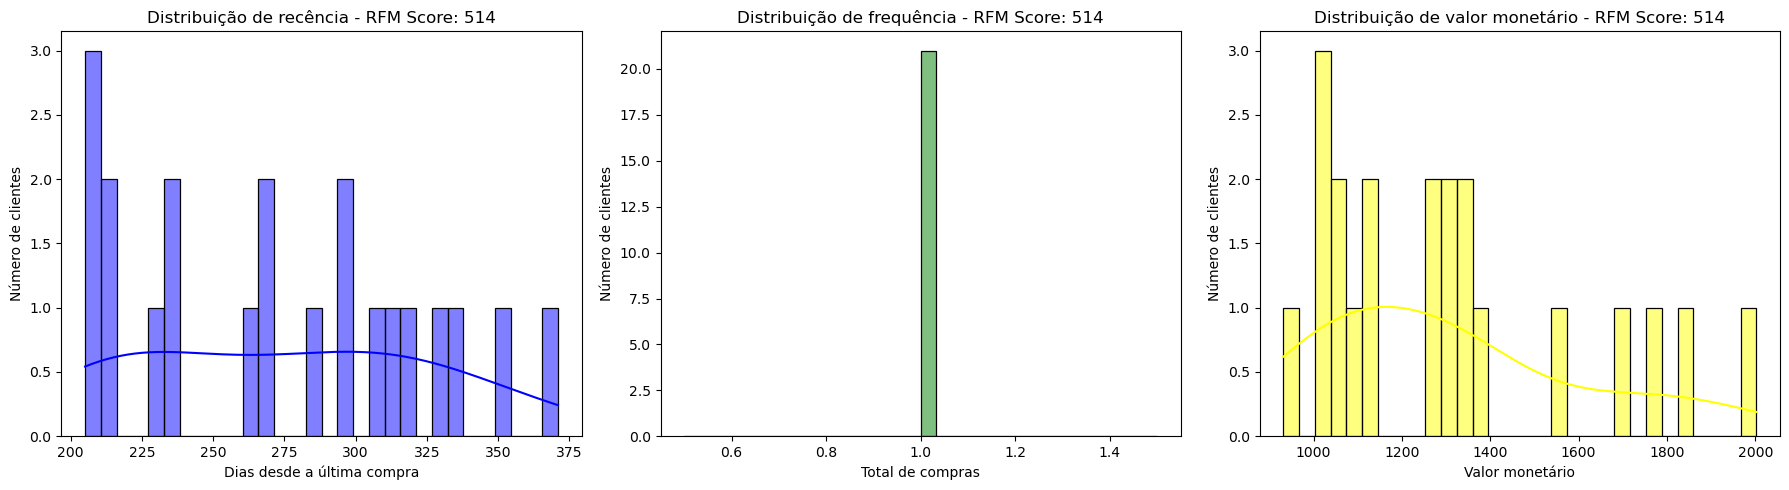

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



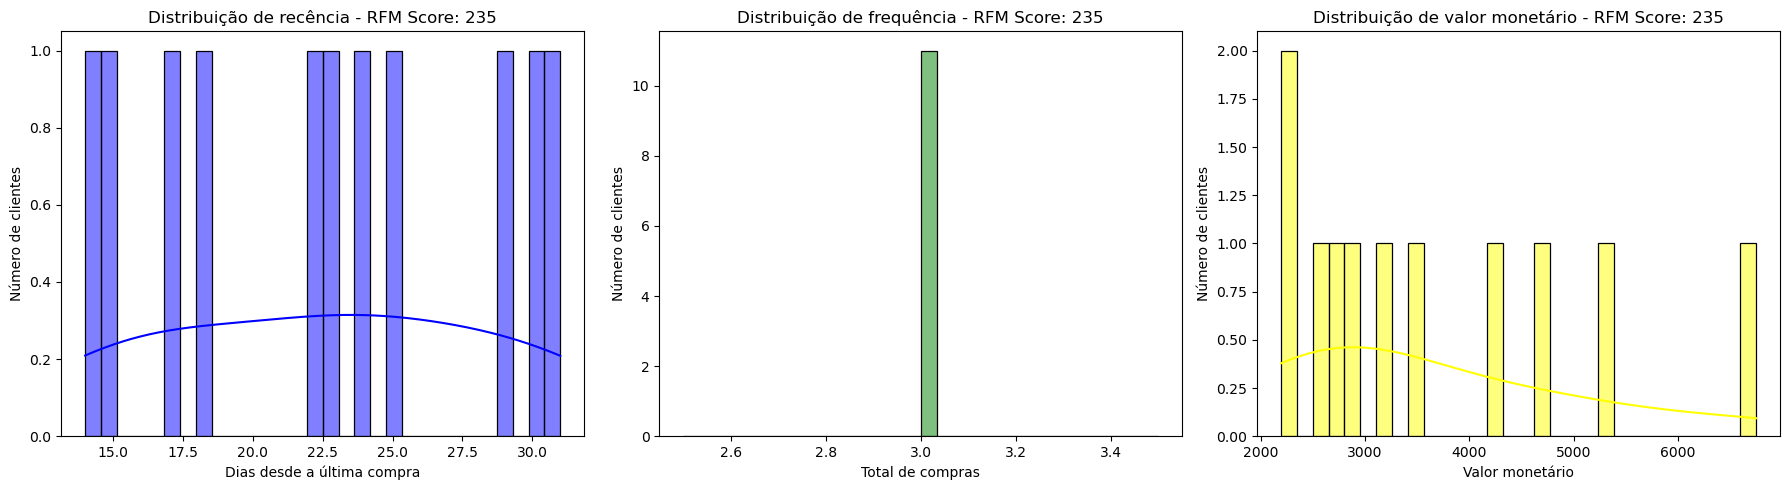

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



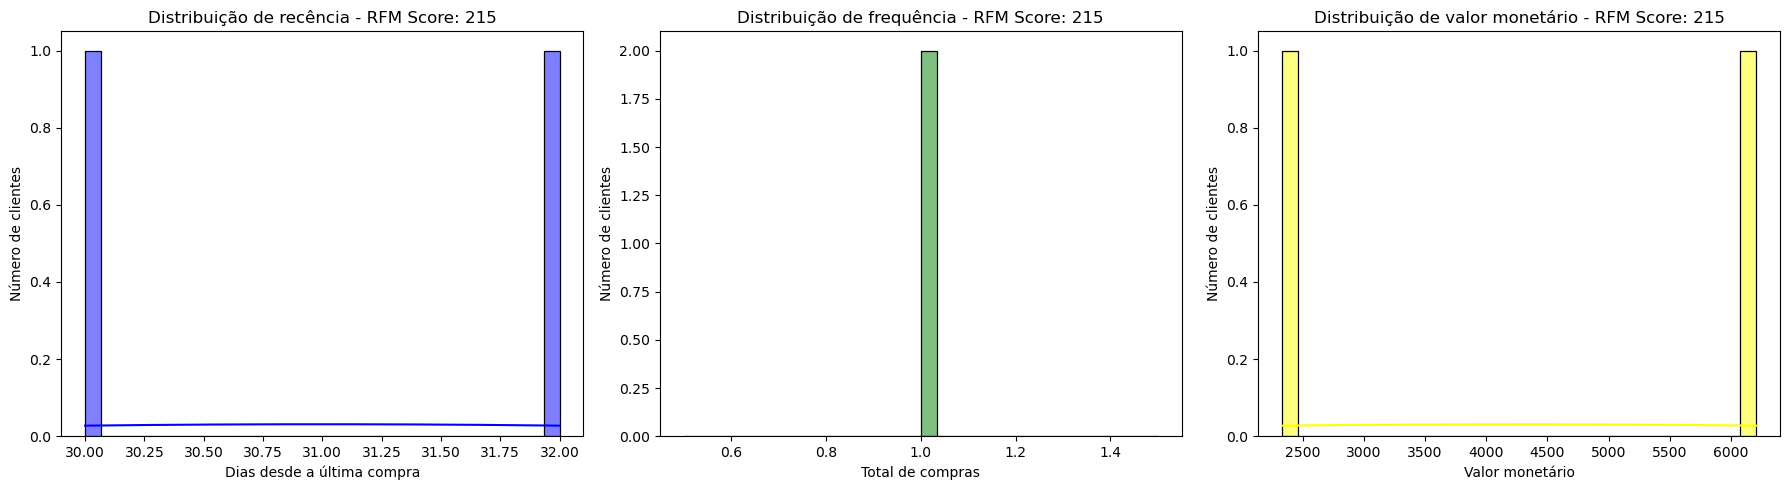

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



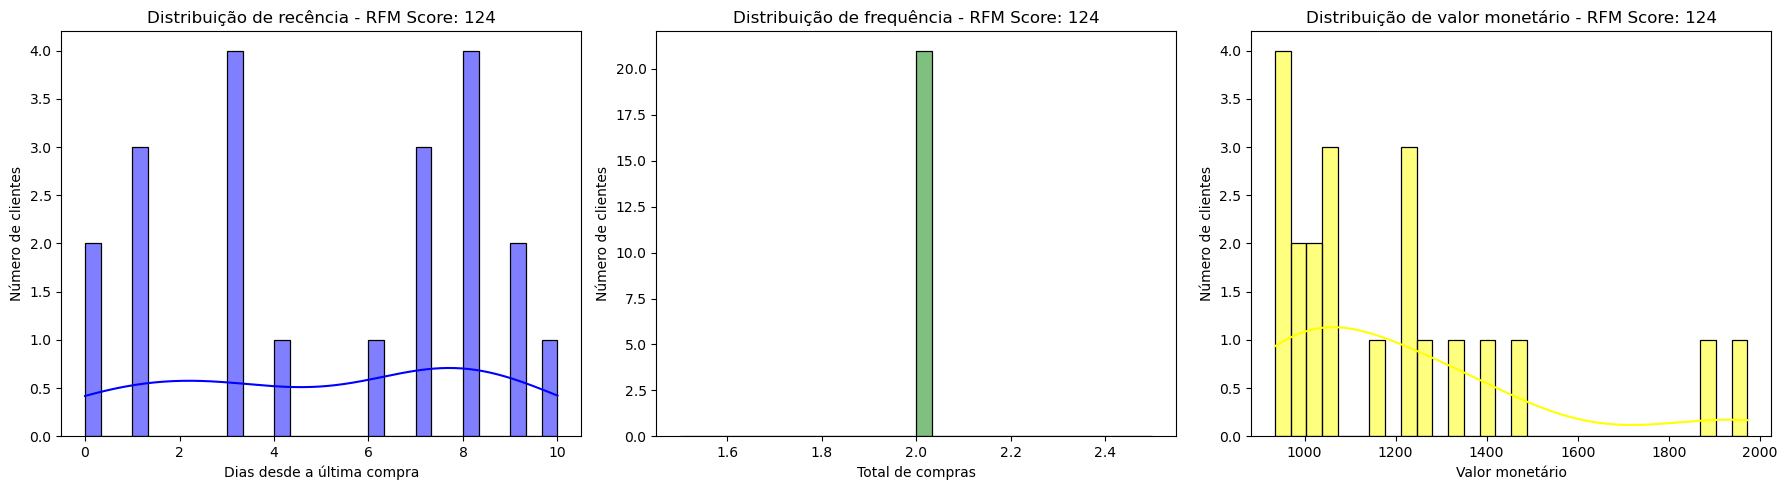

In [259]:
# # Creating the function to plot the graphs
def plot_rfm_distribution(df, rfm_score):
    # Filtering data for RFM score
    segment_data = df[df['RFM_score'] == rfm_score]
    
    plt.figure(figsize=(18, 5))
    
    # Recency
    plt.subplot(1, 3, 1)
    sns.histplot(segment_data['recency'], bins=30, color='blue', kde=True)
    plt.title(f'Distribuição de recência - RFM Score: {rfm_score}')
    plt.xlabel('Dias desde a última compra')
    plt.ylabel('Número de clientes')
    
    # Frequency
    plt.subplot(1, 3, 2)
    sns.histplot(segment_data['frequency'], bins=30, color='green', kde=True)
    plt.title(f'Distribuição de frequência - RFM Score: {rfm_score}')
    plt.xlabel('Total de compras')
    plt.ylabel('Número de clientes')
    
    # Monetary
    plt.subplot(1, 3, 3)
    sns.histplot(segment_data['monetary'], bins=30, color='yellow', kde=True)
    plt.title(f'Distribuição de valor monetário - RFM Score: {rfm_score}')
    plt.xlabel('Valor monetário')
    plt.ylabel('Número de clientes')
    
    # Displaying the graph
    plt.tight_layout()
    plt.show()
    
# Running the function (plot_rfm_distribution) for the first 10 unique RFM scores.
for rfm_score in rfm['RFM_score'].unique()[:10]:
    plot_rfm_distribution(rfm, rfm_score)

Notes:

- The graphs above help us observe the segmentation of customers based on their scores.

- Customers with high recency and high frequency are the most valuable, so we need to keep them engaged with loyalty programs and special offers.

- Customers with low recency and low frequency are at risk of leaving, so we should create reactivation campaigns and incentives to win them back.

- Customers with high recency, high monetary value, and low frequency represent an opportunity to increase the number of repeat purchases.

- Customers with low monetary value and high recency should be encouraged to increase the average value of their purchases.

# Conclusion:

After analyzing the data, it was possible to identify more clearly the periods of higher sales activity, both in terms of months and days of the week. This information is essential for planning marketing strategies, such as targeted promotions and customer loyalty campaigns, especially during slower months. It allows us to keep customers engaged with the store during periods when sales tend to dip.

Additionally, the analysis of outliers revealed that, although they are a minority, they generate significantly higher revenue compared to the groups making lower-value purchases. This highlights the importance of understanding the behavior of these customers and creating strategies to attract them, as they represent a crucial part of the total revenue.

Identifying the best-selling products also provided valuable insights. Among the items that generated the most revenue, the 'Regency Cakestand 3 Tier' stood out as the top seller, followed by products such as the 'WHITE HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING', and 'JUMBO BAG RED RETROSPOT', which also contributed significantly to the store's sales. These products can be considered flagship items and can be used in marketing strategies to further boost sales.

RFM analysis was used to group customers based on their purchasing behavior, considering the recency of their last transaction, purchase frequency, and spending amount, which helped us understand each customer's behavior better and create segments for analysis of each segment individually.

# Link to the dashboard

Link: https://public.tableau.com/views/ProjetoE-commerceEverythingPlus/Painel1?:language=pt-BR&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link